# <span style='color:green'><u> TP 1 - Segmentation Bayésienne </u></span>


## <span style='color:blue'><u> I) Une première idée des enjeux du problème </u></span>


In [1035]:
# Faire les imports des modules necessaires

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from random import gauss 
import pandas as pd
import seaborn as sns

## Question 1

*  ## Question 1.a - Fonction de bruitage

array([200, 100, 200, 200, 200, 100, 100, 100, 100, 100, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 100, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 100, 100, 100, 100, 100, 200,
       100, 200, 200, 200, 100, 100, 100, 200, 200, 100, 100])

Text(0, 0.5, 'Number of occurences')

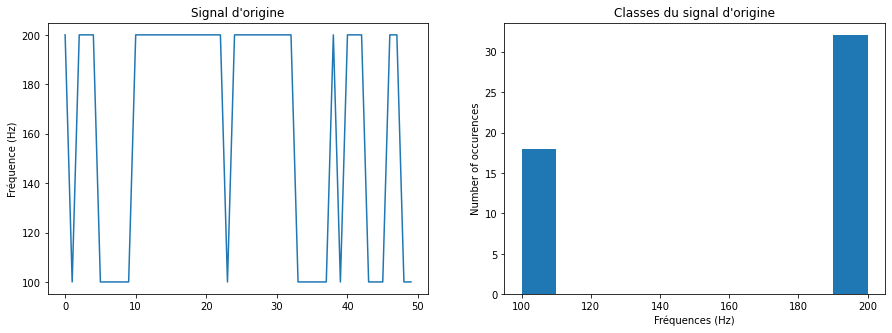

In [1036]:
# Chargement du signal, obtention des classes et affichage du signal

X = np.load('signal.npy')
display(X)

counts, _ = np.histogram(X, bins=int(X.max()+1), range=(0,int(X.max())))
cl1, cl2 = np.nonzero(counts)[0]

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(X)
ax[0].set_title("Signal d'origine")
ax[0].set_ylabel('Fréquence (Hz)')


ax[1].hist(X)
ax[1].set_title("Classes du signal d'origine")
ax[1].set_xlabel('Fréquences (Hz)')
ax[1].set_ylabel('Number of occurences')

In [1037]:
# Définition des variables m1, m2, sig1, sig2

m1 = 120
m2 = 130
sig1 = 5
sig2 = 5

In [1038]:
# Definition de la fonction de bruitage qui, à partir de X qui prend deux classes (cl1,cl2),
#  associe à chaque occurence de X un tirage de deux variables gaussiennes (m1,sig2) et (m2,sig2)

def bruit_gauss2(X,cl1,cl2,m1,sig1,m2,sig2):
    
    Y = (X==cl1)*np.random.normal(m1,sig1,X.shape) + (X==cl2)*np.random.normal(m2,sig2,X.shape)
        
    return Y

Text(0, 0.5, 'Number of occurences')

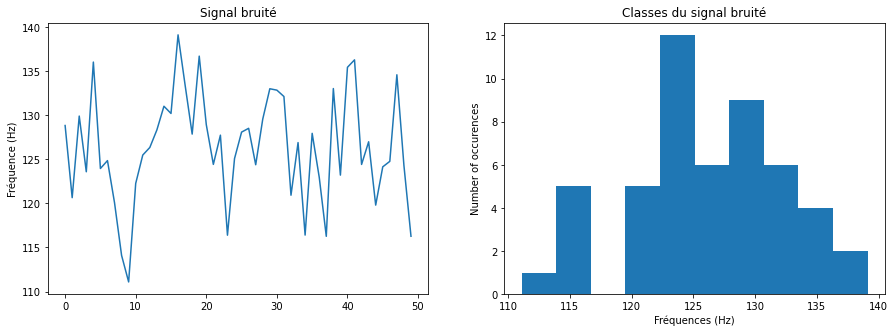

In [1039]:
# Bruitage du signal X

Y = bruit_gauss2(X,cl1,cl2, m1, sig1, m2, sig2)

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(Y)
ax[0].set_title("Signal bruité")
ax[0].set_ylabel('Fréquence (Hz)')


ax[1].hist(Y)
ax[1].set_title("Classes du signal bruité")
ax[1].set_xlabel('Fréquences (Hz)')
ax[1].set_ylabel('Number of occurences')


* ### Question 1.b - Fonction de classification

In [1040]:
# Définition de l'estimateur bayésien

def classif_gauss2(Y,cl1,cl2,m1,sig1,m2,sig2):
    
    pdf1 = norm.pdf(Y,m1,sig1)
    pdf2 = norm.pdf(Y,m2,sig2)
    
    S = np.where(pdf1>pdf2, cl1, cl2)

    return S

Text(0, 0.5, 'Number of occurences')

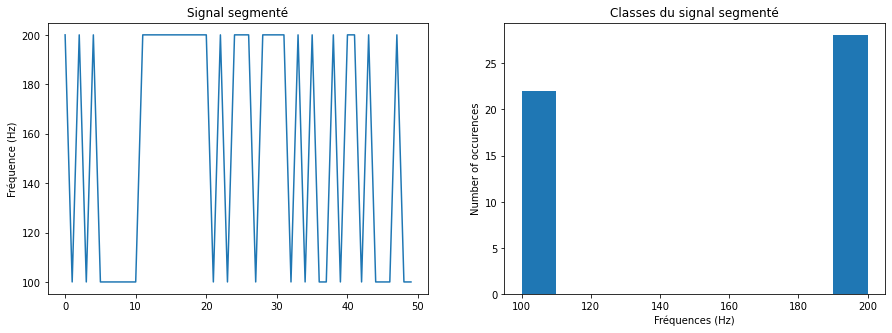

In [1041]:
# Segmentation du signal bruité

S = classif_gauss2(Y,cl1,cl2, m1, sig1, m2, sig2)


fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(S)
ax[0].set_title("Signal segmenté")
ax[0].set_ylabel('Fréquence (Hz)')


ax[1].hist(S)
ax[1].set_title("Classes du signal segmenté")
ax[1].set_xlabel('Fréquences (Hz)')
ax[1].set_ylabel('Number of occurences')

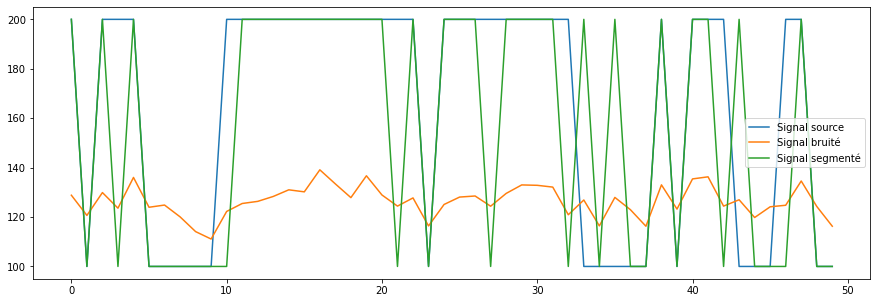

In [1042]:
# Affichage du signal source, du signal bruité et du signal segmenté

plt.figure(figsize=(15,5))
plt.plot(X)
plt.plot(Y)
plt.plot(S)
plt.legend(['Signal source','Signal bruité','Signal segmenté'], loc='best')

### Question 2 - Calcul du taux d'erreur

In [1043]:
# Définition de la fonction d'erreur

def taux_erreur(A,B) : 
    right = (A == B).sum()/len(A)
    tau = 1 - right
    return tau

In [1044]:
# Calcul du taux d'erreur pour le signal test

tau = taux_erreur(X,S)
print(tau)

0.19999999999999996


### Question 3 - Mesure statistique de l'erreur

In [1045]:
%%time
Err = []
T=500

for t in range(1,T):
    Err_t=[]
    for i in range(t):
        
        Y = bruit_gauss2(X,cl1,cl2,m1,sig1,m2,sig2)
        S = classif_gauss2(Y,cl1,cl2,m1,sig1,m2,sig2)
        err = taux_erreur(X,S)
        Err_t.append(err)
    Err.append(np.mean(Err_t))
        
np.mean(Err)

CPU times: user 16.7 s, sys: 24.6 ms, total: 16.8 s
Wall time: 16.8 s


0.1584980549054951

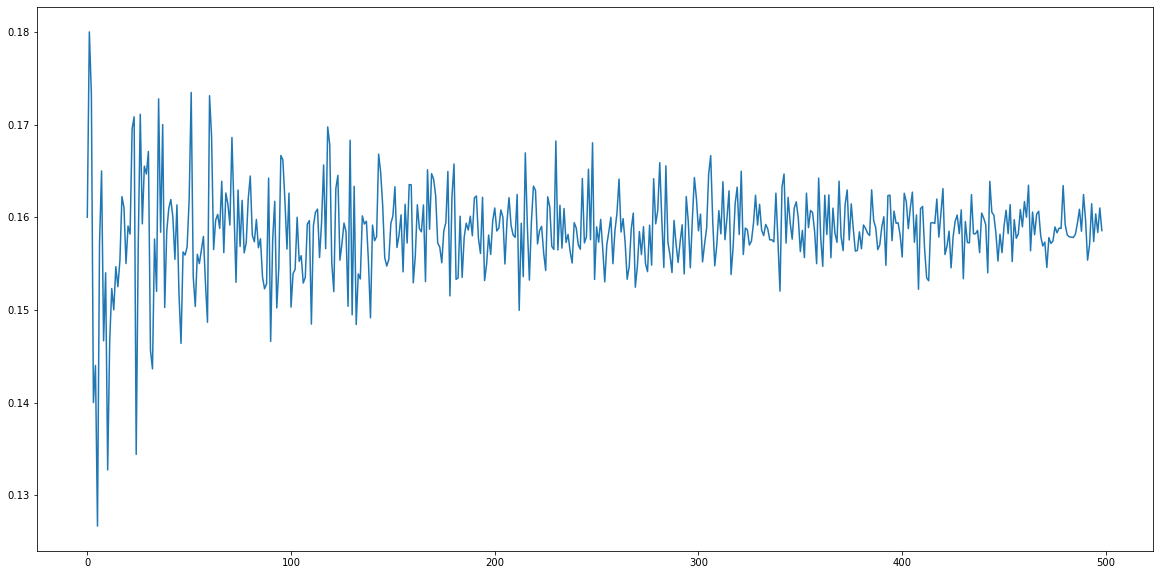

In [1046]:
plt.figure(figsize=(20,10))
plt.plot(Err)
plt.show()

# <span style='color:red'> <u> Commentaire </u></span>
- <b>3b. : </b> Quand T devient grand, l'erreur converge vers l'espérance du taux d'erreur.
- <b>3c. : </b> Ce phénomène s'explique au vu de la Loi des Grands Nombres, à savoir que la moyenne empirique calculée sur un échantillon converge vers l'espérance lorsque la taille de l'échantillon tend vers l'infini (n=500 suffit dans notre cas)
- <b>3d. : </b>


### Question 4 - Généralisation sur les bruits et les signaux

In [1047]:
# Creation des bruits

m1 = [120, 127, 127, 127, 127]
m2 = [130, 127, 128, 128, 128]
sig1 = [1, 1, 1 ,0.1, 2]
sig2 = [2, 5, 1, 0.1, 3]

In [1048]:
# Définition de la fonction qui calcul les différentes erreurs par bruit

def Err1 (X,m1,sig1,m2,sig2):
    
    cl1, cl2 = np.unique(X)
    T=100
    
    Err=[]
    for i in range(T):

        Y = bruit_gauss2(X,cl1,cl2,m1,sig1,m2,sig2)
        S = classif_gauss2(Y,cl1,cl2,m1,sig1,m2,sig2)
        err = taux_erreur(X,S)
        Err.append(err)

    return np.mean(Err)

In [1050]:
# Calcul de l'erreur pour les 5 bruits sur le signal "signal.npy"

X = np.load('signal.npy')

Error_0 = []
for i in range(len(m1)):
    Error_0.append(Err1(X,m1[i],sig1[i],m2[i],sig2[i]))
Error_0

[0.0008000000000000007, 0.1966, 0.2994, 0.0, 0.42119999999999996]

In [1052]:
# Calcul des erreurs par bruit, pour les 5 différents bruits, sur les 6 signaux donnés.

X = []
X.append(np.load('signal.npy'))
for k in range(5):
    X.append(np.load('signal{}.npy'.format(k+1)))
Error=[0,0,0,0,0,0]

for k in range(len(X)):
    Error[k] = []
    for i in range(len(m1)):
        Error[k].append(Err1(X[k],m1[i],sig1[i],m2[i],sig2[i]))

### Affichage et interprétation des résultats

In [1054]:
bruit = pd.DataFrame([m1, sig1, m2, sig2], columns=['Bruit 1', 'Bruit 2', 'Bruit 3', 'Bruit 4', 'Bruit 5'])
bruit['Value']=['m1', 'sig1', 'm2', 'sig2']
bruit.set_index('Value', inplace=True)
bruit.head()

,Bruit 1,Bruit 2,Bruit 3,Bruit 4,Bruit 5
Value,,,,,
m1,120,127,127,127.0,127
sig1,1,1,1,0.1,2
m2,130,127,128,128.0,128
sig2,2,5,1,0.1,3


,Bruit 1,Bruit 2,Bruit 3,Bruit 4,Bruit 5
Signal,,,,,
Signal,0.000800,0.213000,0.314000,0.000000e+00,0.425000
Signal 1,0.000480,0.178200,0.309400,0.000000e+00,0.384480
Signal 2,0.000395,0.176179,0.309073,0.000000e+00,0.380608
Signal 3,0.000400,0.176995,0.308388,2.000000e-07,0.381928
Signal 4,0.000407,0.176760,0.308594,0.000000e+00,0.381174
Signal 5,0.000406,0.176453,0.308620,4.000000e-07,0.381204


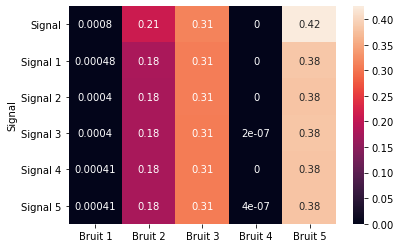

In [1077]:
df1 = pd.DataFrame(Error, columns=['Bruit 1', 'Bruit 2', 'Bruit 3', 'Bruit 4', 'Bruit 5'])
df1['Signal']=['Signal', 'Signal 1', 'Signal 2', 'Signal 3', 'Signal 4', 'Signal 5']
df1.set_index('Signal', inplace=True)
sns.heatmap(df1, annot=True)
df1

# <span style='color:red'> <u> Commentaire : Interprétation des résultats </u></span>
A partir des résultats de notre ségmentation appliqué à differents 'types' de bruits, l'on peut définir deux concepts : `Bruit Faible` et `Bruit Fort` :

- `Bruit Faible` : Est défini comme étant un bruit qui transforme le signal de base en un signal bruité dont les classes sont distribuées autour de valeurs suffisamment éloignées de telle sorte qu'il n'y ait pas de chevauchement lors de la reconstruction du signal d'origine. Cette hypothèse tient aussi dans le cas où le signal bruité est distribué autour de valuers relativement proche, mais dont les variances sont suffisamment petite pour garder la notion de non-chevauchement.

- `Bruit Fort` : A contrario, un bruit fort peut se définir comme renvoyant notre signal de base sur une distribution centrée autour de valeurs proches, ou que les variances soient assez importantes pour qu'un overlap important se produit, de telle sorte qu'à la reclassification, le signal de base ne peut être retrouvé sans erreur importante.

***
***
***

## <span style='color:blue'><u> II) Apport des méthodes bayésiennes de segmentation </u></span>


## <u> Question 1 - Définition des fonctions </u>

 ### 1.a - Calcul de la loi à priori de X en fonction de X

In [997]:
def calc_probaprio2(X,cl1,cl2):
        
    p1 = (X == cl1).sum()/len(X)
    p2 = 1 - p1
    
    return [p1,p2]

### 1.b - Classification des éléments de Y suivant le critère du MAP

In [998]:
def MAP_MPM2(Y,cl1,cl2,p1,p2,m1,sig1,m2,sig2):
    
    pdf1 = norm.pdf(Y, m1, sig1)
    pdf2 = norm.pdf(Y, m2, sig2)
    
    S = np.where(p1*pdf1 > p2*pdf2, cl1, cl2)
    
    return S

## Question 2 - Test de la méthode sur les signaux et bruits de la partie I

### - <span style='color:red'>  Test de convergence du bruit, testé sur le signal 'signal.npy' </span>

In [1061]:
# test initial sur le signal 'signal.npy'

m1 = 120
m2 = 130
sig1 = 5
sig2 = 5

X = np.load('signal.npy')
cl1, cl2 = np.unique(X)
p1, p2 = calc_probaprio2(X,cl1,cl2)

Err = []
T=500

for t in range(1,T):
    Err_t=[]
    for i in range(t):
        
        Y = bruit_gauss2(X,cl1,cl2,m1,sig1,m2,sig2)
        S = MAP_MPM2(Y,cl1,cl2,p1,p2,m1,sig1,m2,sig2)
        err = taux_erreur(X,S)
        Err_t.append(err)
    Err.append(np.mean(Err_t))

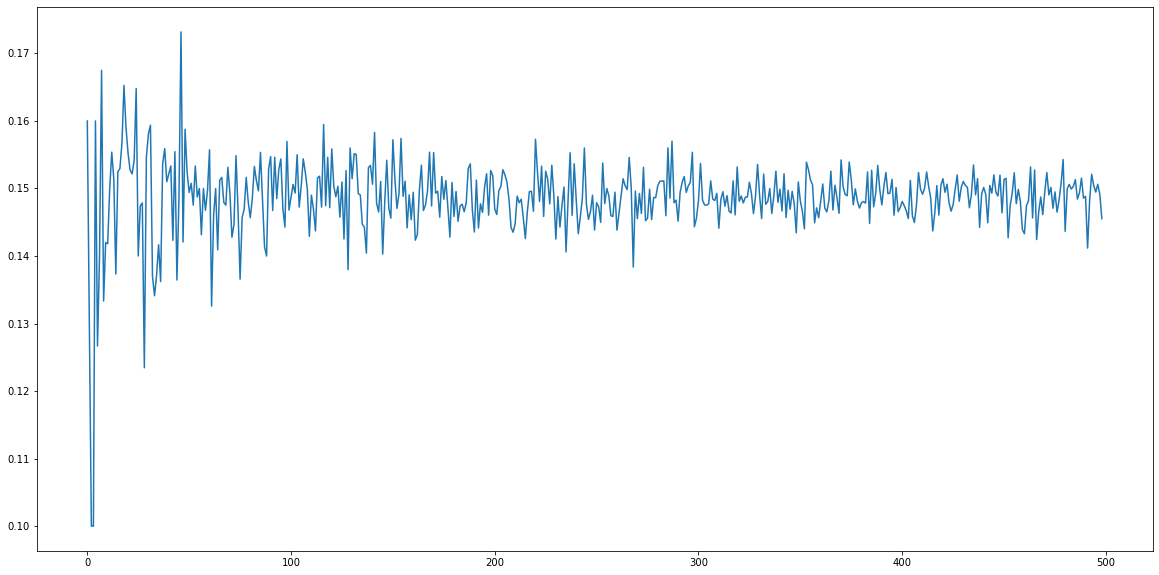

In [1062]:
plt.figure(figsize=(20,10))
plt.plot(Err)
plt.show()

In [1060]:
print("L'erreur moyenne tend vers {}".format(np.round(np.mean(Err),5)))

L'erreur moyenne tend vers 0.1585


### - <span style='color:red'>  Calcul de la matrice des erreurs pour les 5 bruits et les 6 signaux </span>

In [1063]:
# Rappel des bruits

m1 = [120, 127, 127, 127, 127]
m2 = [130, 127, 128, 128, 128]
sig1 = [1, 1, 1 ,0.1, 2]
sig2 = [2, 5, 1, 0.1, 3]

In [1066]:
# Définition de la fonction qui calcule les différentes erreurs par bruit

def Err2_MAP (X,m1,sig1,m2,sig2):
    
    cl1, cl2 = np.unique(X)
    T=100
    
    Err=[]
    for i in range(T):
        p1, p2 = calc_probaprio2(X,cl1,cl2)
        Y = bruit_gauss2(X,cl1,cl2,m1,sig1,m2,sig2)
        S = MAP_MPM2(Y,cl1,cl2,p1,p2,m1,sig1,m2,sig2)
        err = taux_erreur(X,S)
        Err.append(err)

    return np.mean(Err)

In [1068]:
# Création de la variable des signaux
X = []
X.append(np.load('signal.npy'))
for k in range(5):
    X.append(np.load('signal{}.npy'.format(k+1)))


In [1206]:
# Création et affichage de la matrice des bruits pour les 5 bruits et les 6 signaux suivant le criètre du MAP

Error2_MAP=[0,0,0,0,0,0]

for k in range(len(X)):
    Error2_MAP[k] = []
    for i in range(len(m1)):
        Error2_MAP[k].append(Err2_MAP(X[k],m1[i],sig1[i],m2[i],sig2[i]))

df2_MAP = pd.DataFrame(Error2_MAP, columns=['Bruit 1', 'Bruit 2', 'Bruit 3', 'Bruit 4', 'Bruit 5'])
df2_MAP['Signal']=['Signal', 'Signal 1', 'Signal 2', 'Signal 3', 'Signal 4', 'Signal 5']
df2_MAP.set_index('Signal', inplace=True)

df2_MAP

,Bruit 1,Bruit 2,Bruit 3,Bruit 4,Bruit 5
Signal,,,,,
Signal,0.000200,0.205600,0.274000,0.000000e+00,0.360000
Signal 1,0.000400,0.173120,0.310800,0.000000e+00,0.386480
Signal 2,0.000408,0.176314,0.308810,2.000000e-07,0.380631
Signal 3,0.000421,0.176879,0.308417,8.000000e-07,0.381867
Signal 4,0.000397,0.177039,0.308568,4.000000e-07,0.381677
Signal 5,0.000404,0.176216,0.308632,2.000000e-07,0.380670


In [1205]:
# Rappel des résultats des bruits par classification gaussiène

df1

,Bruit 1,Bruit 2,Bruit 3,Bruit 4,Bruit 5
Signal,,,,,
Signal,0.000800,0.213000,0.314000,0.000000e+00,0.425000
Signal 1,0.000480,0.178200,0.309400,0.000000e+00,0.384480
Signal 2,0.000395,0.176179,0.309073,0.000000e+00,0.380608
Signal 3,0.000400,0.176995,0.308388,2.000000e-07,0.381928
Signal 4,0.000407,0.176760,0.308594,0.000000e+00,0.381174
Signal 5,0.000406,0.176453,0.308620,4.000000e-07,0.381204


Text(0.5, 1.0, 'Erreur par classification MAP')

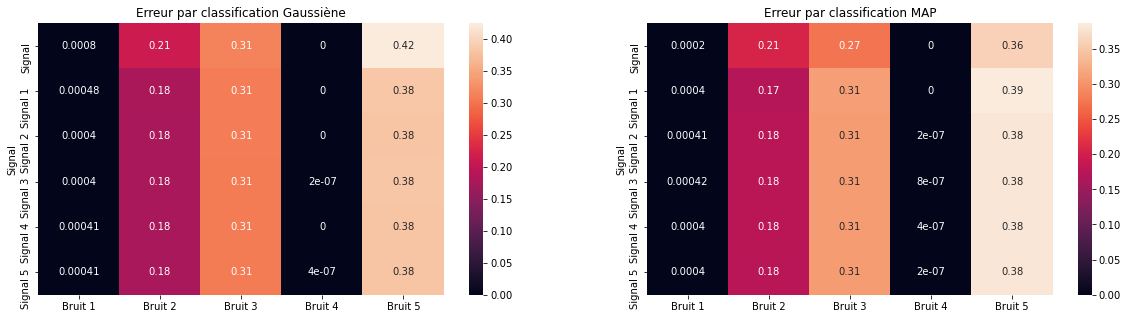

In [1209]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.heatmap(df1, annot=True, ax=ax[0])
sns.heatmap(df2_MAP, annot=True, ax=ax[1])
ax[0].set_title('Erreur par classification Gaussiène')
ax[1].set_title('Erreur par classification MAP')

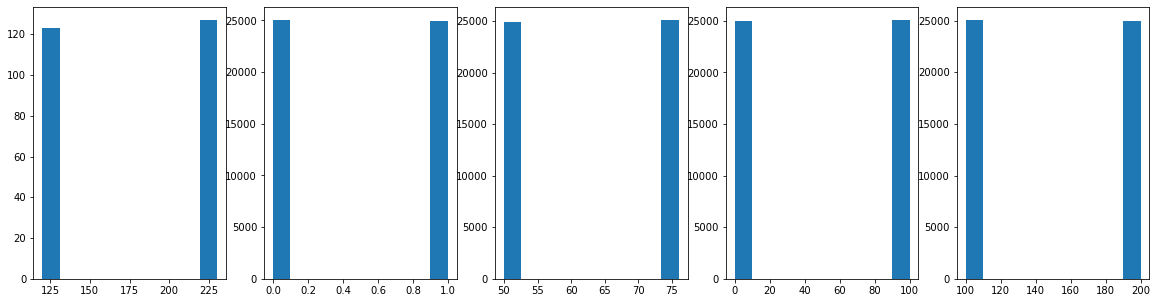

In [987]:
# Affichage des classes des signaux du dossier signaux

fig, ax = plt.subplots(1,5, figsize=(20,5))
for k in range(5):
    X = np.load('signal{}.npy'.format(k+1))
    ax[k].hist(X)

# <span style='color:red'> <u> Commentaire & Interprétation des résultats </u></span>

D'après l'analyse des signaux 1 à 5, nous constatons que les classes sont quasi uniformément distribuées pour tous les signaux.

Dans ce cas là, nous remarquons que la classifaction gaussiène et la classification par MAP renvoie des résultats similaires. Il serait judicieux dans ce cas de tester sur d'autres signaux dont la répartition n'est pas uniforme.

## Question 3 - Définition de la fonction qui simule un signal de n valeurs

In [1119]:
def simul2(n,cl1,cl2,p1,p2):
    import random
    if p1+p2 != 1:
        raise error
    
    X = []
    
    for i in range(int(round(n*p1,0))):
        X.append(cl1)
    for i in range(int(round(n*(1-p1),0))):
        X.append(cl2)
    random.shuffle(X)
    return np.array(X)

## Question 4

In [1120]:
# Rappel des bruits

m1 = [120, 127, 127, 127, 127]
m2 = [130, 127, 128, 128, 128]
sig1 = [1, 1, 1 ,0.1, 2]
sig2 = [2, 5, 1, 0.1, 3]

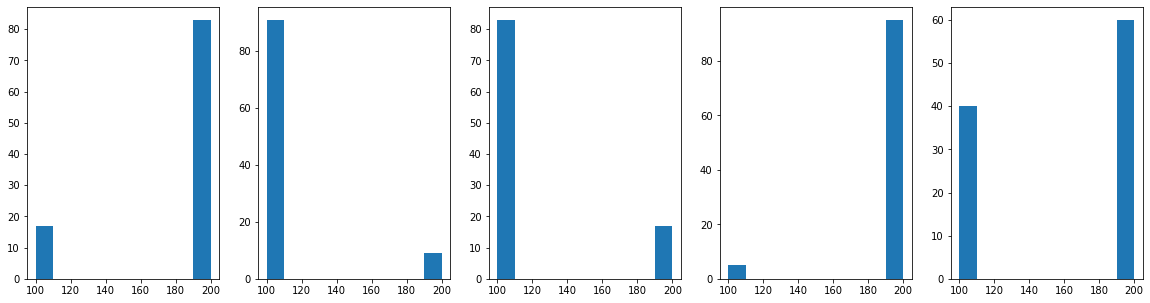

In [1241]:
# Simulation de 5 signaux, centrés autour de 2 classes '100' et '200'.

n = 100
Y=[]
x = np.random.uniform(0,1,5)

for i in range(5):
    Y.append(np.array(simul2(n,100,200,x[i],1-x[i])))

fig, ax = plt.subplots(1,5, figsize=(20,5))
for k in range(5):
    ax[k].hist(Y[k])

In [1242]:
# Création et affichage de la matrice des bruits pour les 5 bruits et les 6 signaux suivant la classification gaussiène

Error_q4=[0,0,0,0,0]

for k in range(len(Y)):
    Error_q4[k] = []
    for i in range(len(m1)):
        Error_q4[k].append(Err1(Y[k],m1[i],sig1[i],m2[i],sig2[i]))

df4 = pd.DataFrame(Error_q4, columns=['Bruit 1', 'Bruit 2', 'Bruit 3', 'Bruit 4', 'Bruit 5'])
df4['Signal']=['Signal 1', 'Signal 2', 'Signal 3', 'Signal 4', 'Signal 5']
df4.set_index('Signal', inplace=True)

print("\n    Erreur par classification Gaussiène\n")
df4


    Erreur par classification Gaussiène



,Bruit 1,Bruit 2,Bruit 3,Bruit 4,Bruit 5
Signal,,,,,
Signal 1,0.0002,0.2542,0.3027,0.0,0.4902
Signal 2,0.0004,0.0918,0.3060,0.0,0.2424
Signal 3,0.0003,0.1035,0.3110,0.0,0.2709
Signal 4,0.0003,0.2746,0.3125,0.0,0.5414
Signal 5,0.0006,0.1913,0.3075,0.0,0.4114


In [1246]:
# Création et affichage de la matrice des bruits pour les 5 bruits et les 6 signaux suivant le criètre du MAP

Error_q4_MAP=[0,0,0,0,0]

for k in range(len(Y)):
    Error_q4_MAP[k] = []
    for i in range(len(m1)):
        Error_q4_MAP[k].append(Err2_MAP(Y[k],m1[i],sig1[i],m2[i],sig2[i]))

df4_MAP = pd.DataFrame(Error_q4_MAP, columns=['Bruit 1', 'Bruit 2', 'Bruit 3', 'Bruit 4', 'Bruit 5'])
df4_MAP['Signal']=['Signal 1', 'Signal 2', 'Signal 3', 'Signal 4', 'Signal 5']
df4_MAP.set_index('Signal', inplace=True)

print("\n    Erreur par classification MAP\n")
df4_MAP


    Erreur par classification MAP



,Bruit 1,Bruit 2,Bruit 3,Bruit 4,Bruit 5
Signal,,,,,
Signal 1,0.0003,0.1706,0.1613,0.0,0.1700
Signal 2,0.0000,0.0421,0.0885,0.0,0.0860
Signal 3,0.0003,0.0763,0.1597,0.0,0.1608
Signal 4,0.0006,0.0500,0.0506,0.0,0.0500
Signal 5,0.0011,0.1982,0.2924,0.0,0.3847


Text(0.5, 1.0, 'Erreur par classification MAP')

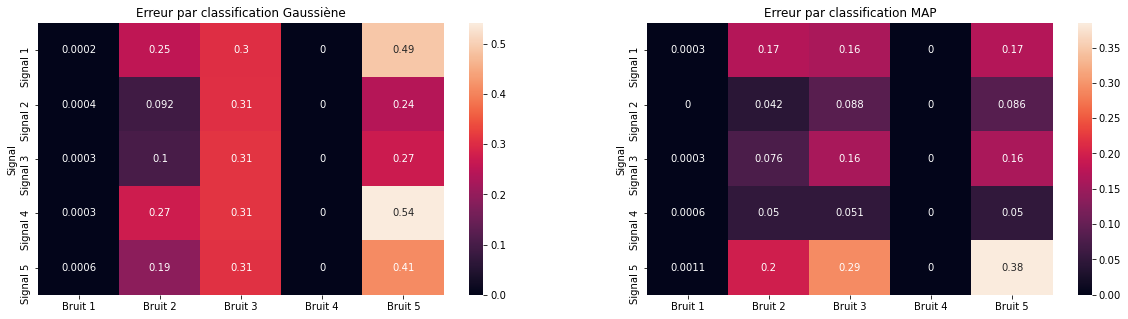

In [1248]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.heatmap(df4, annot=True, ax=ax[0])
sns.heatmap(df4_MAP, annot=True, ax=ax[1])
ax[0].set_title('Erreur par classification Gaussiène')
ax[1].set_title('Erreur par classification MAP')

### <span style='color:red'> <u> Commentaire & Interprétation des résultats </u></span>

Suite à l'analyse de signaux simulés aléatoirement, de proportion p1 et p2 d'apparition des classes, nous constatons que les algorithmes de classifications Gaussiène et MAP renvoient des résultats différents.

Nous remarquons que l'algoritme de classification par critère MAP est plus performant et réduit les erreurs 